In [1]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv("datasets/apps.csv")

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', apps)

# Print a concise summary of apps dataframe
print(apps.info())

# Have a look at a random sample of n rows
n = 5
apps.sample(n)

Total number of apps in the dataset =        Unnamed: 0                                                App  \
0              0     Photo Editor & Candy Camera & Grid & ScrapBook   
1              1                                Coloring book moana   
2              2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3              3                              Sketch - Draw & Paint   
4              4              Pixel Draw - Number Art Coloring Book   
...          ...                                                ...   
9654       10836                                   Sya9a Maroc - FR   
9655       10837                   Fr. Mike Schmitz Audio Teachings   
9656       10838                             Parkinson Exercices FR   
9657       10839                      The SCP Foundation DB fr nn5n   
9658       10840      iHoroscope - 2018 Daily Horoscope & Astrology   

                 Category  Rating  Reviews  Size     Installs  Type Price  \
0          ART_AND_DESIGN     4

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3245,4092,EX File Explorer File Manager,PRODUCTIVITY,4.0,4660,5.9,"1,000,000+",Free,0,Everyone,Productivity,"October 6, 2016",1,4.0 and up
4200,5152,WAH AH,MEDICAL,NaN,0,29.0,100+,Free,0,Everyone,Medical,"May 3, 2017",300000.0.80,4.0.3 and up
9136,10307,FD VR - Virtual Photo Gallery,FAMILY,3.5,179,7.4,"10,000+",Free,0,Everyone,Entertainment,"November 30, 2016",3.6.1,4.4 and up
27,27,Animated Photo Editor,ART_AND_DESIGN,4.1,203,6.1,"100,000+",Free,0,Everyone,Art & Design,"March 21, 2018",1.03,4.0.3 and up
6949,8013,Pocket RxTx Pro,PRODUCTIVITY,4.3,253,NaN,"5,000+",Paid,$3.99,Everyone,Productivity,"March 4, 2018",Varies with device,Varies with device


In [2]:
# List of characters to remove
chars_to_remove = ['+', ',', 'M', '$']
# List of column names to clean
cols_to_clean =  ['Installs', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].astype(str).str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col]) 

In [3]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


In [4]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


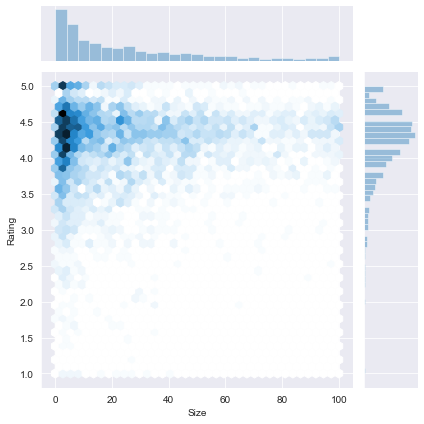

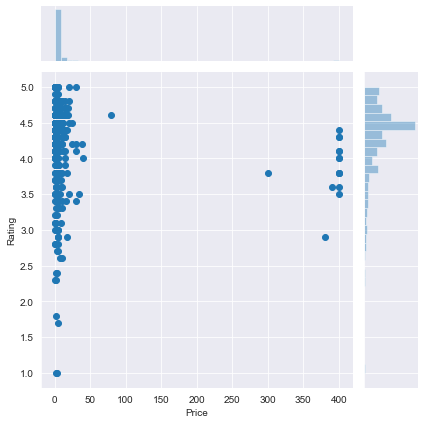

In [5]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Filter rows where both Rating and Size values are not null
apps_with_size_and_rating_present = apps[(~apps['Size'].isnull()) & (~apps['Rating'].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

# Subset apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present["Type"] == "Paid"]

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"])

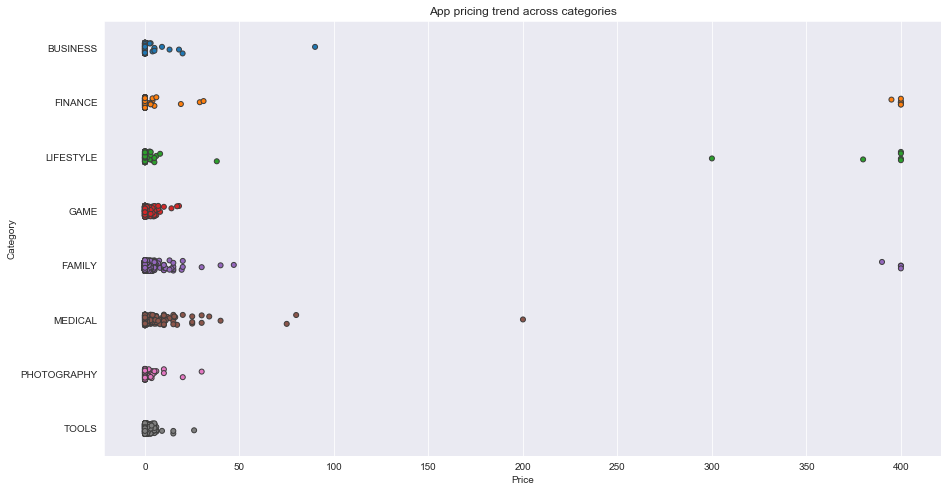

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats["Price"] > 200]

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

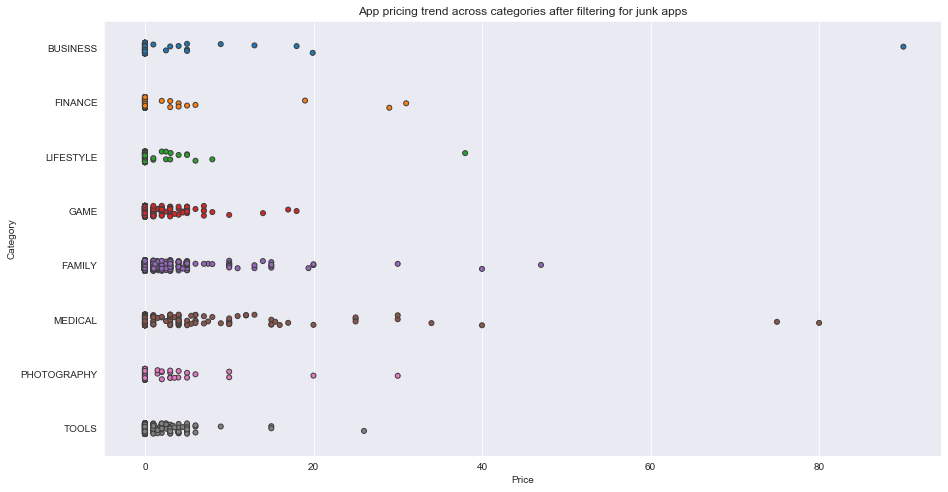

In [7]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats["Price"] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x=apps_under_100['Price'],y= apps_under_100['Category'] ,data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

In [8]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

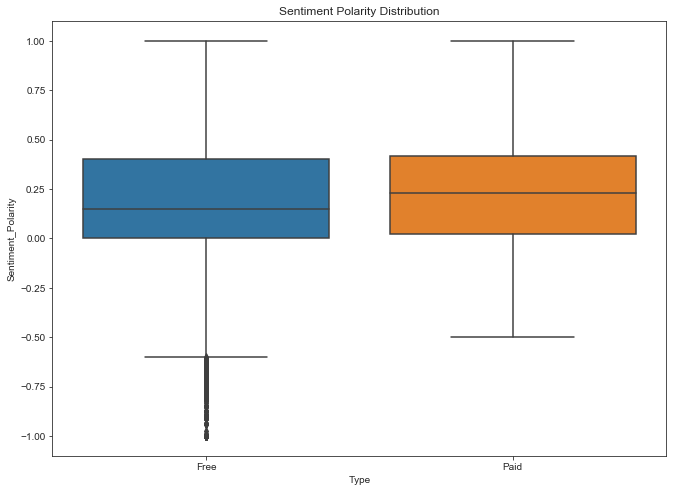

In [9]:
# Load user_reviews.csv
reviews_df = pd.read_csv("datasets/user_reviews.csv")

# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, on = "App", how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x ='Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')